# Obsessed with Boba? Analyzing Bubble Tea Shops in NYC Using the Yelp Fusion API
Data Wrangling: Retrieving Bubble Tea Shops in NYC Using Yelp Fusion API

In this notebook, we use the Yelp Fusion API to read in data about Bubble Tea Shops in NYC. Additionally, we preview the data, examine the number of rows and columns, and clip only shops that are within NYC's five boroughs. This output data will be the data we use throughout the project.

# Importing libraries

In [1]:
# importing libraries
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
# from decouple import AutoConfig

# Retrieving data from Yelp API

In [2]:
'''API only returns 1,000 results and 50 per request 
   we use the offset parameter to page through to the next 50 
   source: https://www.yelp.com/developers/faq'''

# saving yelp api key as an environment variable
API_KEY = os.environ.get('yelp_api')
if API_KEY is None:
    config = AutoConfig(search_path = '.')
    API_KEY = config('YELP_API')

# empty list to place our data for each page
lst = []

# our offset parameter - each page 50 rows
offset = 0
print('initial offset number: {}'.format(offset))

# loop through the api 20 times (limit is 1000 rows with each page includes 50 rows)
for i in range(20):
    
    try:
        headers = {'Authorization': 'Bearer {}'.format(API_KEY)}
        search_api_url = 'https://api.yelp.com/v3/businesses/search'
        params = {'term': 'bubble tea', 
                  'categories': 'bubbletea, boba',
                  'location': 'New York City',
                  'offset': offset,
                  'limit': 50}

        response = requests.get(search_api_url, 
                                headers=headers, 
                                params=params, 
                                timeout=10)

        # return a dictionary
        data_dict = response.json()
        
        # convert the business dictionary to a pandas dataframe and append to list
        data = pd.DataFrame(data_dict['businesses'])
        lst.append(data)
      
        # add 50 to the offset to access a new page
        offset += 50
        print('current offset number: {}'.format(offset))
        
    except Exception as ex:
        print('exception: {}\nexit loop.'.format(ex))
        break

# concatenate all pages to one dataframe and reset index
df = pd.concat(lst)
df = df.reset_index(drop=True)

# review shape of dataframe
rows, columns = df.shape
print()
print('query includes {:,} rows and {} columns.'.format(rows, columns))
print('row id is unique: {}.'.format(df['id'].is_unique))

# review if dataframe id is unique, if not drop duplicates
if df['id'].is_unique == False:
    duplicates = df.loc[df.duplicated(subset=['id'])]
    vals = list(duplicates.head()['name'].values)
    print('\nduplicates found: {}.'.format(vals))
    
    df = df.drop_duplicates(subset=['id']).reset_index(drop=True)
    print('dropping duplicates...')
    
    rows, columns = df.shape
    print('\nrow id is unique: {}.'.format(df['id'].is_unique))
    print('query includes {:,} rows and {} columns.'.format(rows, columns))

NameError: name 'AutoConfig' is not defined

# Inspect data

In [3]:
# preview first five rows
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[pickup, delivery]","{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427,NaN
1,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[pickup, delivery]","{'address1': '23 Clinton St', 'address2': None...",,,1877.016204,$$
2,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[pickup, delivery]","{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614,$$
3,nndSS7va9wFlBYzA3zv1nw,ojbk-tea-shop-brooklyn-2,OJBK Tea Shop,https://s3-media1.fl.yelpcdn.com/bphoto/TOjiM7...,False,https://www.yelp.com/biz/ojbk-tea-shop-brookly...,26,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.69395, 'longitude': -73.96369}","[pickup, delivery]","{'address1': '525 Myrtle Ave', 'address2': '',...",+17185763047,(718) 576-3047,2879.927001,$
4,FKjAriOhhGZJSlkqrk8zWg,i-milky-沐白-new-york-3,I’Milky 沐白,https://s3-media4.fl.yelpcdn.com/bphoto/D04UPg...,False,https://www.yelp.com/biz/i-milky-%E6%B2%90%E7%...,260,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7513413, 'longitude': -73.9864...","[pickup, delivery]","{'address1': '992 6th Ave', 'address2': '', 'a...",+12122396712,(212) 239-6712,5160.340089,$


In [4]:
# preview last five rows
df.tail()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
548,QBebLBqhiuDlWasPgp6s4Q,tbaar-flushing-5,Tbaar,https://s3-media1.fl.yelpcdn.com/bphoto/bgao-b...,False,https://www.yelp.com/biz/tbaar-flushing-5?adju...,2,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.759357, 'longitude': -73.830396}","[pickup, delivery]","{'address1': '135-52 Roosevelt Ave', 'address2...",,,15054.917573,NaN
549,7apqk24GsFC9dptoD5dDZg,uncleman-cafe-new-york,Uncleman Cafe,,False,https://www.yelp.com/biz/uncleman-cafe-new-yor...,1,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",1.0,"{'latitude': 40.71781, 'longitude': -73.99795}",[],"{'address1': '122 Mulberry St', 'address2': No...",+12129666206,(212) 966-6206,1414.238245,NaN
550,Vz6hbICqQfyMWq9wzAKakw,tbaar-flushing-4,TBaar,https://s3-media1.fl.yelpcdn.com/bphoto/phUYWa...,False,https://www.yelp.com/biz/tbaar-flushing-4?adju...,6,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7613116, 'longitude': -73.8308...",[],"{'address1': '37-11 Main St', 'address2': '', ...",,,15147.410738,NaN
551,YBgAPbviWYtVP2gAUhc7_A,t-baar-flushing,T Baar,https://s3-media4.fl.yelpcdn.com/bphoto/8pk-_Q...,False,https://www.yelp.com/biz/t-baar-flushing?adjus...,8,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.7587509, 'longitude': -73.830162}",[],"{'address1': '135-36 40th Rd', 'address2': '',...",,,15045.970192,$
552,f5UVQXvDpOrrIZdCjsw47w,maxins-cafe-flushing,Maxin's Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/S3vWvD...,False,https://www.yelp.com/biz/maxins-cafe-flushing?...,15,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",3.5,"{'latitude': 40.7585, 'longitude': -73.83064}",[],"{'address1': '135-24 40th Rd', 'address2': '',...",+17188869200,(718) 886-9200,14997.842205,$


In [5]:
# preview column datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             553 non-null    object 
 1   alias          553 non-null    object 
 2   name           553 non-null    object 
 3   image_url      553 non-null    object 
 4   is_closed      553 non-null    bool   
 5   url            553 non-null    object 
 6   review_count   553 non-null    int64  
 7   categories     553 non-null    object 
 8   rating         553 non-null    float64
 9   coordinates    553 non-null    object 
 10  transactions   553 non-null    object 
 11  location       553 non-null    object 
 12  phone          553 non-null    object 
 13  display_phone  553 non-null    object 
 14  distance       553 non-null    float64
 15  price          334 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 65.5+ KB


In [6]:
# return count of unique values of bubble tea shops
df['name'].value_counts()

Gong Cha                  37
Kung Fu Tea               34
ViVi Bubble Tea           20
Möge Tee                  10
CoCo Fresh Tea & Juice     8
                          ..
Brew Memories              1
Dragon Bing                1
Hug a Mug Coffee & Tea     1
Yummy Boba Desserts        1
Zai's Dessertery           1
Name: name, Length: 368, dtype: int64

In [7]:
# return top 20 count of unique values of bubble tea shops
df['name'].value_counts().head(20)

Gong Cha                       37
Kung Fu Tea                    34
ViVi Bubble Tea                20
Möge Tee                       10
CoCo Fresh Tea & Juice          8
Vivi Bubble Tea                 6
Coco Fresh Tea & Juice          6
Tiger Sugar                     5
Real Fruit Bubble Tea           5
Meet Fresh                      4
Banhmigos                       4
Chun Yang Tea                   4
Hawa Smoothies & Bubble Tea     4
TBaar                           4
Hanco's                         3
Yi Fang Taiwan Fruit Tea        3
Lazy Sundaes                    3
Mi Tea                          3
Tbaar                           3
Waffle & Bubble                 3
Name: name, dtype: int64

# Inspect categories

In [8]:
df['categories'].head()

0      [{'alias': 'bubbletea', 'title': 'Bubble Tea'}]
1    [{'alias': 'bubbletea', 'title': 'Bubble Tea'}...
2      [{'alias': 'bubbletea', 'title': 'Bubble Tea'}]
3      [{'alias': 'bubbletea', 'title': 'Bubble Tea'}]
4    [{'alias': 'bubbletea', 'title': 'Bubble Tea'}...
Name: categories, dtype: object

In [9]:
df['categories'].apply(pd.Series)

,0,1,2
0,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
1,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'desserts', 'title': 'Desserts'}","{'alias': 'shavedice', 'title': 'Shaved Ice'}"
2,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
3,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
4,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'taiwanese', 'title': 'Taiwanese'}","{'alias': 'juicebars', 'title': 'Juice Bars & ..."
...,...,...,...
548,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
549,"{'alias': 'desserts', 'title': 'Desserts'}","{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'cafes', 'title': 'Cafes'}"
550,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'juicebars', 'title': 'Juice Bars & ...","{'alias': 'coffee', 'title': 'Coffee & Tea'}"
551,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN


In [10]:
categories_df = df['categories'].apply(pd.Series)
categories_df.columns = ['cat_1', 'cat_2', 'cat_3']

categories_df

,cat_1,cat_2,cat_3
0,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
1,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'desserts', 'title': 'Desserts'}","{'alias': 'shavedice', 'title': 'Shaved Ice'}"
2,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
3,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
4,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'taiwanese', 'title': 'Taiwanese'}","{'alias': 'juicebars', 'title': 'Juice Bars & ..."
...,...,...,...
548,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
549,"{'alias': 'desserts', 'title': 'Desserts'}","{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'cafes', 'title': 'Cafes'}"
550,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'juicebars', 'title': 'Juice Bars & ...","{'alias': 'coffee', 'title': 'Coffee & Tea'}"
551,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN


# Check for duplicates

In [11]:
# identify number of unique bubble tea shop entries
names_counts = df['name'].value_counts().reset_index()
names_counts = names_counts.rename(columns={'index':'name', 'name':'counts'})

print('number of unique bubble tea shops: {}'.format(len(names_counts)))
names_counts

number of unique bubble tea shops: 368


,name,counts
0,Gong Cha,37
1,Kung Fu Tea,34
2,ViVi Bubble Tea,20
3,Möge Tee,10
4,CoCo Fresh Tea & Juice,8
...,...,...
363,Brew Memories,1
364,Dragon Bing,1
365,Hug a Mug Coffee & Tea,1
366,Yummy Boba Desserts,1


In [12]:
# check for duplicates - white spaces, mispellings, etc
lst = []
for row in range(len(names_counts)):
    value = names_counts['name'][row].replace(' ', '').lower()
    lst.append(value)  
    
names_counts = pd.concat([names_counts, pd.Series(lst).rename('name_lower')], axis=1)
names_counts.head()    

,name,counts,name_lower
0,Gong Cha,37,gongcha
1,Kung Fu Tea,34,kungfutea
2,ViVi Bubble Tea,20,vivibubbletea
3,Möge Tee,10,mögetee
4,CoCo Fresh Tea & Juice,8,cocofreshtea&juice


In [13]:
# there are duplicate entries
names_counts['name_lower'].value_counts().head(10)

yifangtaiwanfruittea    3
jooyteashoppe           3
tbaar                   3
vivibubbletea           3
cocofreshtea&juice      2
pokébowlstation         2
yomie'sricexyogurt      2
mr.wish                 2
tigersugar              2
corndogunion            1
Name: name_lower, dtype: int64

In [14]:
# return list of duplicate entries that need to be replaced
duplicates_ser = names_counts['name_lower'].value_counts() > 1
duplicates = duplicates_ser.loc[duplicates_ser].index

print('these places have dulicate entries:\n')
for dup in duplicates.to_list():
    print(dup)  

these places have dulicate entries:

yifangtaiwanfruittea
jooyteashoppe
tbaar
vivibubbletea
cocofreshtea&juice
pokébowlstation
yomie'sricexyogurt
mr.wish
tigersugar


In [15]:
names_counts = (names_counts.loc[names_counts['name_lower'].isin(duplicates.to_list())]
                .sort_values(by='name_lower'))

names_counts

,name,counts,name_lower
4,CoCo Fresh Tea & Juice,8,cocofreshtea&juice
6,Coco Fresh Tea & Juice,6,cocofreshtea&juice
354,JOOY Tea Shoppe,1,jooyteashoppe
227,Jooy Tea Shoppe,1,jooyteashoppe
99,JOOY TEA SHOPPE,1,jooyteashoppe
21,Mr. Wish,3,mr.wish
64,Mr.Wish,1,mr.wish
320,Pokébowl Station,1,pokébowlstation
49,PokéBowl Station,2,pokébowlstation
13,TBaar,4,tbaar


In [16]:
# a dictionary of formatted names (lower & remove white spice) and new names to be returned
new_names = {'yifangtaiwanfruittea':'Yi Fang Taiwan Fruit Tea',
             'vivibubbletea':'Vivi Bubble Tea',
             'jooyteashoppe':'JOOY Tea Shop',
             'tbaar':'TBaar',
             'cocofreshtea&juice':'CoCo Fresh Tea & Juice',
             "yomie'sricexyogurt":"Yomie's Rice X Yogurt",
             'pokébowlstation':'PokéBowl Station'}

names_counts['name_lower'] = names_counts['name_lower'].replace(new_names)

names_counts

,name,counts,name_lower
4,CoCo Fresh Tea & Juice,8,CoCo Fresh Tea & Juice
6,Coco Fresh Tea & Juice,6,CoCo Fresh Tea & Juice
354,JOOY Tea Shoppe,1,JOOY Tea Shop
227,Jooy Tea Shoppe,1,JOOY Tea Shop
99,JOOY TEA SHOPPE,1,JOOY Tea Shop
21,Mr. Wish,3,mr.wish
64,Mr.Wish,1,mr.wish
320,Pokébowl Station,1,PokéBowl Station
49,PokéBowl Station,2,PokéBowl Station
13,TBaar,4,TBaar


In [17]:
# a dictionary of old and new names to be returned
replace_duplicates = dict(zip(names_counts['name'], names_counts['name_lower']))

replace_duplicates

{'CoCo Fresh Tea & Juice': 'CoCo Fresh Tea & Juice',
 'Coco Fresh Tea & Juice': 'CoCo Fresh Tea & Juice',
 'JOOY Tea Shoppe': 'JOOY Tea Shop',
 'Jooy Tea Shoppe': 'JOOY Tea Shop',
 'JOOY TEA SHOPPE': 'JOOY Tea Shop',
 'Mr. Wish': 'mr.wish',
 'Mr.Wish': 'mr.wish',
 'Pokébowl Station': 'PokéBowl Station',
 'PokéBowl Station': 'PokéBowl Station',
 'TBaar': 'TBaar',
 'Tbaar': 'TBaar',
 'T Baar': 'TBaar',
 'Tiger Sugar': 'tigersugar',
 'TIGER SUGAR': 'tigersugar',
 'ViVi Bubble Tea': 'Vivi Bubble Tea',
 'Vivi Bubble Tea': 'Vivi Bubble Tea',
 'ViVi Bubble tea': 'Vivi Bubble Tea',
 'Yifang Taiwan Fruit Tea': 'Yi Fang Taiwan Fruit Tea',
 'Yi Fang Taiwan Fruit Tea': 'Yi Fang Taiwan Fruit Tea',
 'YiFang Taiwan Fruit Tea': 'Yi Fang Taiwan Fruit Tea',
 "Yomie's Rice x Yogurt": "Yomie's Rice X Yogurt",
 "Yomie's Rice X Yogurt": "Yomie's Rice X Yogurt"}

In [18]:
# replace old and new names to original dataframe
df['name'] = df['name'].replace(replace_duplicates)

df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[pickup, delivery]","{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427,NaN
1,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[pickup, delivery]","{'address1': '23 Clinton St', 'address2': None...",,,1877.016204,$$
2,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[pickup, delivery]","{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614,$$
3,nndSS7va9wFlBYzA3zv1nw,ojbk-tea-shop-brooklyn-2,OJBK Tea Shop,https://s3-media1.fl.yelpcdn.com/bphoto/TOjiM7...,False,https://www.yelp.com/biz/ojbk-tea-shop-brookly...,26,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.69395, 'longitude': -73.96369}","[pickup, delivery]","{'address1': '525 Myrtle Ave', 'address2': '',...",+17185763047,(718) 576-3047,2879.927001,$
4,FKjAriOhhGZJSlkqrk8zWg,i-milky-沐白-new-york-3,I’Milky 沐白,https://s3-media4.fl.yelpcdn.com/bphoto/D04UPg...,False,https://www.yelp.com/biz/i-milky-%E6%B2%90%E7%...,260,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7513413, 'longitude': -73.9864...","[pickup, delivery]","{'address1': '992 6th Ave', 'address2': '', 'a...",+12122396712,(212) 239-6712,5160.340089,$


In [19]:
df['name'].value_counts().head(20)

Gong Cha                       37
Kung Fu Tea                    34
Vivi Bubble Tea                27
CoCo Fresh Tea & Juice         14
Möge Tee                       10
TBaar                           8
Yi Fang Taiwan Fruit Tea        8
tigersugar                      6
Real Fruit Bubble Tea           5
Banhmigos                       4
Meet Fresh                      4
mr.wish                         4
Chun Yang Tea                   4
Hawa Smoothies & Bubble Tea     4
Waffle & Bubble                 3
Lazy Sundaes                    3
Mi Tea                          3
Jupioca                         3
Hanco's                         3
JOOY Tea Shop                   3
Name: name, dtype: int64

# Inspecting categories

In [20]:
df['categories']

0        [{'alias': 'bubbletea', 'title': 'Bubble Tea'}]
1      [{'alias': 'bubbletea', 'title': 'Bubble Tea'}...
2        [{'alias': 'bubbletea', 'title': 'Bubble Tea'}]
3        [{'alias': 'bubbletea', 'title': 'Bubble Tea'}]
4      [{'alias': 'bubbletea', 'title': 'Bubble Tea'}...
                             ...                        
548      [{'alias': 'bubbletea', 'title': 'Bubble Tea'}]
549    [{'alias': 'desserts', 'title': 'Desserts'}, {...
550    [{'alias': 'bubbletea', 'title': 'Bubble Tea'}...
551      [{'alias': 'bubbletea', 'title': 'Bubble Tea'}]
552    [{'alias': 'bakeries', 'title': 'Bakeries'}, {...
Name: categories, Length: 553, dtype: object

In [21]:
df['categories'].apply(pd.Series)

,0,1,2
0,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
1,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'desserts', 'title': 'Desserts'}","{'alias': 'shavedice', 'title': 'Shaved Ice'}"
2,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
3,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
4,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'taiwanese', 'title': 'Taiwanese'}","{'alias': 'juicebars', 'title': 'Juice Bars & ..."
...,...,...,...
548,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN
549,"{'alias': 'desserts', 'title': 'Desserts'}","{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'cafes', 'title': 'Cafes'}"
550,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}","{'alias': 'juicebars', 'title': 'Juice Bars & ...","{'alias': 'coffee', 'title': 'Coffee & Tea'}"
551,"{'alias': 'bubbletea', 'title': 'Bubble Tea'}",NaN,NaN


# Clip shops within NYC

In [22]:
# explode coordinates to create an individual column
gdf = pd.concat([df, df['coordinates'].apply(pd.Series)], axis=1)

# retrieve lat, lon values and return a geodataframe
gdf = gpd.GeoDataFrame(gdf, crs=4326, 
      geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))

gdf.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,latitude,longitude,geometry
0,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[pickup, delivery]","{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427,NaN,40.728800,-73.987750,POINT (-73.98775 40.72880)
1,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[pickup, delivery]","{'address1': '23 Clinton St', 'address2': None...",,,1877.016204,$$,40.720597,-73.984539,POINT (-73.98454 40.72060)
2,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[pickup, delivery]","{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614,$$,40.719174,-73.996220,POINT (-73.99622 40.71917)
3,nndSS7va9wFlBYzA3zv1nw,ojbk-tea-shop-brooklyn-2,OJBK Tea Shop,https://s3-media1.fl.yelpcdn.com/bphoto/TOjiM7...,False,https://www.yelp.com/biz/ojbk-tea-shop-brookly...,26,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.69395, 'longitude': -73.96369}","[pickup, delivery]","{'address1': '525 Myrtle Ave', 'address2': '',...",+17185763047,(718) 576-3047,2879.927001,$,40.693950,-73.963690,POINT (-73.96369 40.69395)
4,FKjAriOhhGZJSlkqrk8zWg,i-milky-沐白-new-york-3,I’Milky 沐白,https://s3-media4.fl.yelpcdn.com/bphoto/D04UPg...,False,https://www.yelp.com/biz/i-milky-%E6%B2%90%E7%...,260,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7513413, 'longitude': -73.9864...","[pickup, delivery]","{'address1': '992 6th Ave', 'address2': '', 'a...",+12122396712,(212) 239-6712,5160.340089,$,40.751341,-73.986447,POINT (-73.98645 40.75134)


In [23]:
# read in boroughs shapefile to return only bubble tea shops within nyc
url = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'
boro_gdf = gpd.read_file(url)

boro_gdf.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,1.0,Manhattan,6.366208e+08,359993.127161,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2.0,Bronx,1.187194e+09,463868.935588,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3.0,Brooklyn,1.934174e+09,728195.194837,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
3,5.0,Staten Island,1.623631e+09,325924.002252,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
4,4.0,Queens,3.040206e+09,900269.281914,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


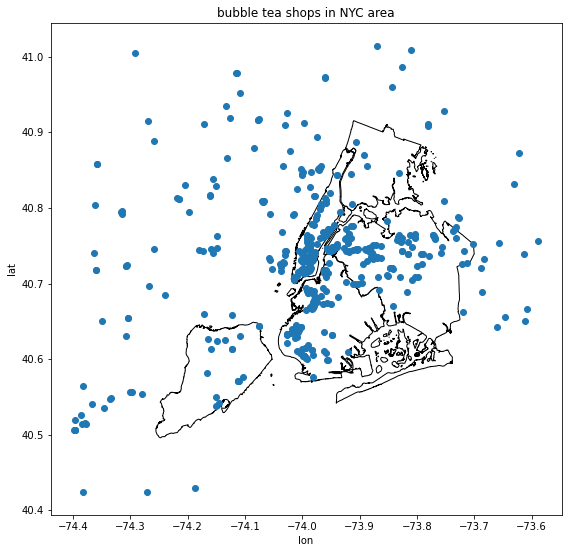

In [24]:
# plot bubble tea shops and boroughs
fig, ax = plt.subplots(figsize=(8, 8))

gdf.plot(ax=ax)
boro_gdf.plot(ax=ax, facecolor='None', edgecolor='black', zorder=0)

plt.title('bubble tea shops in NYC area')
plt.xlabel('lon')
plt.ylabel('lat')
plt.tight_layout()

In [25]:
# clip bubble tea shops that are within the five boroughs
gdf = gpd.clip(gdf, boro_gdf)
gdf = gdf.reset_index(drop=True)

rows, columns = gdf.shape
print('number of rows: {}\n\
number of columns: {}'.format(rows, columns))

number of rows: 414
number of columns: 19


In [26]:
# preview dataframe
gdf.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,latitude,longitude,geometry
0,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[pickup, delivery]","{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427,NaN,40.728800,-73.987750,POINT (-73.98775 40.72880)
1,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[pickup, delivery]","{'address1': '23 Clinton St', 'address2': None...",,,1877.016204,$$,40.720597,-73.984539,POINT (-73.98454 40.72060)
2,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[pickup, delivery]","{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614,$$,40.719174,-73.996220,POINT (-73.99622 40.71917)
3,nndSS7va9wFlBYzA3zv1nw,ojbk-tea-shop-brooklyn-2,OJBK Tea Shop,https://s3-media1.fl.yelpcdn.com/bphoto/TOjiM7...,False,https://www.yelp.com/biz/ojbk-tea-shop-brookly...,26,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.69395, 'longitude': -73.96369}","[pickup, delivery]","{'address1': '525 Myrtle Ave', 'address2': '',...",+17185763047,(718) 576-3047,2879.927001,$,40.693950,-73.963690,POINT (-73.96369 40.69395)
4,FKjAriOhhGZJSlkqrk8zWg,i-milky-沐白-new-york-3,I’Milky 沐白,https://s3-media4.fl.yelpcdn.com/bphoto/D04UPg...,False,https://www.yelp.com/biz/i-milky-%E6%B2%90%E7%...,260,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7513413, 'longitude': -73.9864...","[pickup, delivery]","{'address1': '992 6th Ave', 'address2': '', 'a...",+12122396712,(212) 239-6712,5160.340089,$,40.751341,-73.986447,POINT (-73.98645 40.75134)


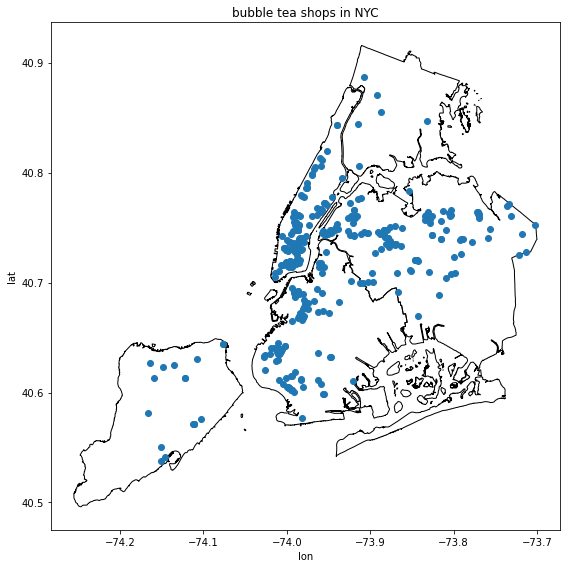

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf.plot(ax=ax)
boro_gdf.plot(ax=ax, facecolor='None', edgecolor='black', zorder=0)

plt.title('bubble tea shops in NYC')
plt.xlabel('lon')
plt.ylabel('lat')
plt.tight_layout()

In [28]:
# # save file
# gdf.to_csv('boba-nyc.csv', index=False)

In [29]:
# # sanity check
# pd.read_csv('boba-nyc.csv').head()